In [1]:
# # pip install wandb
# ! pip install lightgbm  

In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import wandb
from sklearn.ensemble import RandomForestClassifier

régi legjobb eredménnyel lefuttatni
rocaucra pontosítani
loss-t kivenni

In [3]:
readIn = pd.read_csv("data/train_df.csv")
train_df = pd.DataFrame(readIn)

In [4]:
train_df

,BORROWER_ID,target,CONTRACT_ID_SUM,CONTRACT_CREDIT_LOSS_SUM,CONTRACT_DEPT_SERVICE_TO_INCOME_MEAN,CONTRACT_INCOME_SUM,CONTRACT_INSTALMENT_AMOUNT_MEAN,CONTRACT_INTEREST_RATE_MEAN,CONTRACT_LGD_SUM,CONTRACT_LOAN_AMOUNT_SUM,...,CONTRACT_REFINANCED_10001.0,CONTRACT_TYPE_OF_INTEREST_REPAYMENT_0.0,CONTRACT_TYPE_OF_INTEREST_REPAYMENT_100001.0,CONTRACT_TYPE_OF_INTEREST_REPAYMENT_100002.0,CONTRACT_TYPE_OF_INTEREST_REPAYMENT_100003.0,CONTRACT_TYPE_OF_INTEREST_REPAYMENT_100004.0,CONTRACT_TYPE_OF_INTEREST_REPAYMENT_110001.0,CONTRACT_TYPE_OF_INTEREST_REPAYMENT_140001.0,CONTRACT_TYPE_OF_INTEREST_REPAYMENT_140002.0,CONTRACT_TYPE_OF_INTEREST_REPAYMENT_140003.0
0,d8SqtuEV,0,2,0.0,17.27,129364.0,12012.0,21.50,359391.0,396086,...,0,2,0,0,0,0,0,0,0,0
1,lrdxML0g,0,1,0.0,0.00,0.0,9528.0,16.57,994868.0,55590,...,0,1,0,0,0,0,0,0,0,0
2,gII7nnq4,0,1,16350.0,7.05,127305.0,8899.0,22.35,282553.0,275924,...,0,0,0,0,1,0,0,0,0,0
3,MMkJ8z/e,0,1,0.0,0.00,0.0,14329.0,0.00,68981.0,138862,...,0,1,0,0,0,0,0,0,0,0
4,M417onFP,0,1,2395.0,0.00,0.0,4003.0,23.92,163319.0,169624,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437017,pNIqzUE4,0,1,0.0,0.00,0.0,0.0,0.00,0.0,299931,...,0,1,0,0,0,0,0,0,0,0
437018,clBMCzqR,0,1,0.0,0.00,0.0,0.0,0.00,0.0,13293921,...,0,1,0,0,0,0,0,0,0,0
437019,WkX2GJQS,0,1,0.0,0.00,0.0,0.0,0.00,0.0,272812,...,0,1,0,0,0,0,0,0,0,0
437020,+5cUBKRc,0,1,0.0,0.00,0.0,0.0,0.00,0.0,272812,...,0,1,0,0,0,0,0,0,0,0


In [5]:
readIn = pd.read_csv("data/res_df.csv")
df = pd.DataFrame(readIn)

In [6]:
df

,BORROWER_ID,target,CONTRACT_ID_SUM,CONTRACT_CREDIT_LOSS_SUM,CONTRACT_DEPT_SERVICE_TO_INCOME_MEAN,CONTRACT_INCOME_SUM,CONTRACT_INSTALMENT_AMOUNT_MEAN,CONTRACT_INTEREST_RATE_MEAN,CONTRACT_LGD_SUM,CONTRACT_LOAN_AMOUNT_SUM,...,CONTRACT_REFINANCED_10001.0,CONTRACT_TYPE_OF_INTEREST_REPAYMENT_0.0,CONTRACT_TYPE_OF_INTEREST_REPAYMENT_100001.0,CONTRACT_TYPE_OF_INTEREST_REPAYMENT_100002.0,CONTRACT_TYPE_OF_INTEREST_REPAYMENT_100003.0,CONTRACT_TYPE_OF_INTEREST_REPAYMENT_100004.0,CONTRACT_TYPE_OF_INTEREST_REPAYMENT_110001.0,CONTRACT_TYPE_OF_INTEREST_REPAYMENT_140001.0,CONTRACT_TYPE_OF_INTEREST_REPAYMENT_140002.0,CONTRACT_TYPE_OF_INTEREST_REPAYMENT_140003.0
0,d8SqtuEV,0,3,13831.0,27.76,256244.0,27149.0,17.31,3295461.0,3367556,...,0,2,0,1,0,0,0,0,0,0
1,lrdxML0g,0,1,0.0,0.00,0.0,9528.0,16.57,994868.0,55590,...,0,1,0,0,0,0,0,0,0,0
2,gII7nnq4,0,1,16350.0,7.05,127305.0,8899.0,22.35,282553.0,275924,...,0,0,0,0,1,0,0,0,0,0
3,MMkJ8z/e,0,1,0.0,0.00,0.0,14329.0,0.00,68981.0,138862,...,0,1,0,0,0,0,0,0,0,0
4,M417onFP,0,1,2395.0,0.00,0.0,4003.0,23.92,163319.0,169624,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1149846,POeQToeq,0,1,0.0,0.00,0.0,0.0,0.00,0.0,211813,...,0,1,0,0,0,0,0,0,0,0
1149847,C0amt32x,0,1,0.0,0.00,0.0,0.0,0.00,0.0,485818,...,0,1,0,0,0,0,0,0,0,0
1149848,WW5vgE+y,0,1,0.0,0.00,0.0,0.0,0.00,0.0,5866242,...,0,1,0,0,0,0,0,0,0,0
1149849,26ZlUKOa,0,1,0.0,0.00,0.0,0.0,0.00,0.0,80914,...,0,1,0,0,0,0,0,0,0,0


In [7]:
readIn = pd.read_csv("data/data_submission_example.csv")
df_target = pd.DataFrame(readIn)

In [47]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Bemenő változók és célváltozó meghatározása
# bemenő_változók = train_df.columns.drop(['BORROWER_ID', 'target'])  # Az összes oszlop, kivéve a 'BORROWER_ID' és 'target'

bemenő_változók=[
                 'CONTRACT_CREDIT_LOSS_SUM',
                 'CONTRACT_DEPT_SERVICE_TO_INCOME_MEAN',
                 'CONTRACT_INCOME_SUM','CONTRACT_INSTALMENT_AMOUNT_MEAN',
                 'CONTRACT_INTEREST_RATE_MEAN',
                 'CONTRACT_LGD_SUM',
                 'CONTRACT_LOAN_AMOUNT_SUM',
                 'CONTRACT_MORTGAGE_LENDING_VALUE_SUM',
                 'BORROWER_TYPE_OF_SETTLEMENT_3.0',
                 'CONTRACT_BANK_ID_1d42bbf5',
                 'CONTRACT_BANK_ID_2c6f5579',
                 'CONTRACT_BANK_ID_3b3b8a5e',
                 'CONTRACT_BANK_ID_41562c5f',
                 'CONTRACT_BANK_ID_c8072c06',
                 'CONTRACT_BANK_ID_caa130b5',
                 'CONTRACT_BANK_ID_dfce4aec',
                 'CONTRACT_CREDIT_INTERMEDIARY_1.0',
                 'CONTRACT_CREDIT_INTERMEDIARY_20001.0',
                 'CONTRACT_CURRENCY_14',
                 'CONTRACT_FREQUENCY_TYPE_3265c5b7',
                 'CONTRACT_FREQUENCY_TYPE_ad534644',
                 'CONTRACT_LOAN_CONTRACT_TYPE_1',
                 'CONTRACT_LOAN_CONTRACT_TYPE_2',
                 'CONTRACT_LOAN_CONTRACT_TYPE_11',
                 'CONTRACT_LOAN_TYPE_5a06241e',
                 'CONTRACT_LOAN_TYPE_83910425',
                 'CONTRACT_LOAN_TYPE_b503a0de',
                 'CONTRACT_LOAN_TYPE_d3aaffde',
                 'CONTRACT_LOAN_TYPE_eab72d7a',
                 'CONTRACT_REFINANCED_2.0',
                 'CONTRACT_REFINANCED_10001.0',
                 'CONTRACT_TYPE_OF_INTEREST_REPAYMENT_0.0',
                 'CONTRACT_TYPE_OF_INTEREST_REPAYMENT_100001.0',
                 'CONTRACT_TYPE_OF_INTEREST_REPAYMENT_100003.0',
                 'CONTRACT_TYPE_OF_INTEREST_REPAYMENT_140002.0',
                 'CONTRACT_TYPE_OF_INTEREST_REPAYMENT_140003.0',
                 'BORROWER_COUNTY_6.0',
                 'BORROWER_COUNTY_84.0',
                 'BORROWER_COUNTY_114.0',
                 'BORROWER_COUNTY_163.0',
                 'BORROWER_COUNTY_181.0' ]

X = train_df[bemenő_változók]  # Bemenő változók
y = train_df['target']  # Célváltozó

In [48]:
model = RandomForestClassifier(random_state=22, n_estimators= 120, max_depth=10, min_samples_split=10, min_samples_leaf=4, max_features=5,n_jobs=4)

max_feature állítás!

In [49]:
model.fit(X,y)

RandomForestClassifier(max_depth=10, max_features=5, min_samples_leaf=4,
                       min_samples_split=10, n_estimators=120, n_jobs=4,
                       random_state=22)

# SAVING RESULTS

In [50]:
merged_df = df[df['BORROWER_ID'].isin(df_target['BORROWER_ID'])]

In [51]:
X = merged_df[bemenő_változók]

In [ ]:
merged_df['predicted_target'] = model.predict_proba(X)[:,1]

In [ ]:
cols=['BORROWER_ID', 'predicted_target']

res=merged_df[cols]

In [ ]:
res.columns=['BORROWER_ID', 'PRED']

In [ ]:
#best so far: 0.009575465119473077

res['PRED'].mean()

In [ ]:
res['PRED']*=0.0148/res['PRED'].mean()

In [ ]:
res['PRED']=res['PRED'].apply(lambda x: 1 if x>1 else x)

In [ ]:
res['PRED'].mean()

In [ ]:
print(res.shape)
res.to_csv('data/result-best-mu.csv', index=False)

In [21]:
readIn = pd.read_csv("data/res-best.csv")
res2 = pd.DataFrame(readIn)

In [22]:
merge=pd.merge(res,res2, on='BORROWER_ID')

In [23]:
merge.sample(20)

,BORROWER_ID,PRED_x,PRED_y
334120,jdQZZYVS,0.001452,0.001281
1102238,QPfhPg53,0.000377,0.000552
981655,5YBxE5hv,0.001523,0.001650
24911,G5zqJb8x,0.000456,0.000646
317572,TQE+02OW,0.001513,0.001533
200552,LPgzbeWR,0.017697,0.015656
1013730,XA/RGX/E,0.002014,0.002315
732020,QoQCmTSM,0.004258,0.004436
481981,H9Vq0JUk,0.001788,0.002039
239854,KWaZe7Fi,0.001555,0.001626


<Axes: >

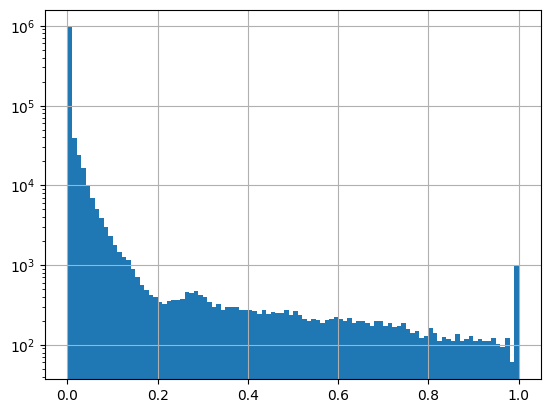

In [24]:
res['PRED'].hist(bins=100, log=True)

In [25]:
importance = model.feature_importances_

dict_imp={}

with open('fontossagok.txt', 'w') as file:
    for i, val in enumerate(importance):
        dict_imp[bemenő_változók[i]]=val
        print(f"A(z) {bemenő_változók[i]} oszlop fontossága: {val}")
        file.write(f"A(z) {bemenő_változók[i]} oszlop fontossága: {val}\n")

with open('fontossagok-tomb.txt', 'w') as file:
    for i, val in enumerate(importance):
        if (val>0):
            file.write(f"'{bemenő_változók[i]}',")

A(z) CONTRACT_CREDIT_LOSS_SUM oszlop fontossága: 0.1564866764778692
A(z) CONTRACT_DEPT_SERVICE_TO_INCOME_MEAN oszlop fontossága: 0.012991413681114105
A(z) CONTRACT_INCOME_SUM oszlop fontossága: 0.015917058095758205
A(z) CONTRACT_INSTALMENT_AMOUNT_MEAN oszlop fontossága: 0.036747903474293304
A(z) CONTRACT_INTEREST_RATE_MEAN oszlop fontossága: 0.04165703256050116
A(z) CONTRACT_LGD_SUM oszlop fontossága: 0.03550203162829712
A(z) CONTRACT_LOAN_AMOUNT_SUM oszlop fontossága: 0.030991519724671616
A(z) CONTRACT_MORTGAGE_LENDING_VALUE_SUM oszlop fontossága: 0.007764053435715404
A(z) BORROWER_TYPE_OF_SETTLEMENT_3.0 oszlop fontossága: 0.0025193583084191394
A(z) CONTRACT_BANK_ID_1d42bbf5 oszlop fontossága: 0.012528513697595212
A(z) CONTRACT_BANK_ID_2c6f5579 oszlop fontossága: 0.0061529998142054185
A(z) CONTRACT_BANK_ID_3b3b8a5e oszlop fontossága: 0.0002311106273075905
A(z) CONTRACT_BANK_ID_41562c5f oszlop fontossága: 0.0
A(z) CONTRACT_BANK_ID_c8072c06 oszlop fontossága: 0.006166390119642385
A(z) C

In [26]:
import operator
sorted_columns = sorted(dict_imp.items(), key=operator.itemgetter(1), reverse=True)

# Kiíratás vagy további felhasználás
for column, importance in sorted_columns:
    print(f'{column}: {importance}')
    

CONTRACT_CREDIT_LOSS_SUM: 0.1564866764778692
CONTRACT_LOAN_TYPE_5a06241e: 0.1554869055974479
CONTRACT_REFINANCED_10001.0: 0.12066232410800558
CONTRACT_TYPE_OF_INTEREST_REPAYMENT_140002.0: 0.10560900509090113
CONTRACT_CREDIT_INTERMEDIARY_20001.0: 0.08879117680569479
CONTRACT_LOAN_TYPE_83910425: 0.04426549310624521
CONTRACT_INTEREST_RATE_MEAN: 0.04165703256050116
CONTRACT_INSTALMENT_AMOUNT_MEAN: 0.036747903474293304
CONTRACT_LGD_SUM: 0.03550203162829712
CONTRACT_LOAN_AMOUNT_SUM: 0.030991519724671616
CONTRACT_BANK_ID_caa130b5: 0.030147933236194444
CONTRACT_INCOME_SUM: 0.015917058095758205
CONTRACT_TYPE_OF_INTEREST_REPAYMENT_0.0: 0.01477203036825225
CONTRACT_DEPT_SERVICE_TO_INCOME_MEAN: 0.012991413681114105
CONTRACT_BANK_ID_1d42bbf5: 0.012528513697595212
CONTRACT_TYPE_OF_INTEREST_REPAYMENT_100003.0: 0.0124076926396678
CONTRACT_LOAN_TYPE_b503a0de: 0.010843126894810613
CONTRACT_FREQUENCY_TYPE_3265c5b7: 0.01056026047531271
CONTRACT_LOAN_CONTRACT_TYPE_1: 0.00815382242128629
CONTRACT_MORTGAGE_L

In [27]:
import operator
sorted_columns = sorted(dict_imp.items(), key=operator.itemgetter(1), reverse=True)

# Kiíratás vagy további felhasználás
for column, importance in sorted_columns:
    print(f'{column}: {importance}')

CONTRACT_CREDIT_LOSS_SUM: 0.1564866764778692
CONTRACT_LOAN_TYPE_5a06241e: 0.1554869055974479
CONTRACT_REFINANCED_10001.0: 0.12066232410800558
CONTRACT_TYPE_OF_INTEREST_REPAYMENT_140002.0: 0.10560900509090113
CONTRACT_CREDIT_INTERMEDIARY_20001.0: 0.08879117680569479
CONTRACT_LOAN_TYPE_83910425: 0.04426549310624521
CONTRACT_INTEREST_RATE_MEAN: 0.04165703256050116
CONTRACT_INSTALMENT_AMOUNT_MEAN: 0.036747903474293304
CONTRACT_LGD_SUM: 0.03550203162829712
CONTRACT_LOAN_AMOUNT_SUM: 0.030991519724671616
CONTRACT_BANK_ID_caa130b5: 0.030147933236194444
CONTRACT_INCOME_SUM: 0.015917058095758205
CONTRACT_TYPE_OF_INTEREST_REPAYMENT_0.0: 0.01477203036825225
CONTRACT_DEPT_SERVICE_TO_INCOME_MEAN: 0.012991413681114105
CONTRACT_BANK_ID_1d42bbf5: 0.012528513697595212
CONTRACT_TYPE_OF_INTEREST_REPAYMENT_100003.0: 0.0124076926396678
CONTRACT_LOAN_TYPE_b503a0de: 0.010843126894810613
CONTRACT_FREQUENCY_TYPE_3265c5b7: 0.01056026047531271
CONTRACT_LOAN_CONTRACT_TYPE_1: 0.00815382242128629
CONTRACT_MORTGAGE_L

In [28]:
# print(res.shape)
# res.to_csv('data/results2.csv', index=False)

In [29]:
len(bemenő_változók)

41

In [30]:
imp=[]
imp2=[]
for i in range(len(i1)):
    if(i1[i]>0):
        imp.append(i1[i])

for i in range(len(importance)):
    imp2.append(importance[i])

NameError: name 'i1' is not defined

In [ ]:
imp

In [ ]:
imp2

In [ ]:
for i in range(len(importance)):
    print(imp[i]-importance[i])

In [ ]:


column_importance = {
    'CONTRACT_CREDIT_LOSS_SUM': 0.16910412766343422,
    'CONTRACT_DEPT_SERVICE_TO_INCOME_MEAN': 0.0010854199994039476,
    'CONTRACT_INCOME_SUM': 0.00016402107884890086,
    'CONTRACT_INSTALMENT_AMOUNT_MEAN': 0.031180862589240545,
    'CONTRACT_INTEREST_RATE_MEAN': 0.030192901911618403,
    'CONTRACT_LGD_SUM': 0.0325214105387914,
    'CONTRACT_LOAN_AMOUNT_SUM': 0.059547996438097175,
    'CONTRACT_MORTGAGE_LENDING_VALUE_SUM': 0.0,
    'BORROWER_COUNTY_6.0': 0.0005365996241172926,
    'BORROWER_COUNTY_84.0': 6.109712470258696e-05,
    'BORROWER_COUNTY_114.0': 9.897689643537617e-05,
    'BORROWER_COUNTY_163.0': 0.00019303156699422723,
    'BORROWER_COUNTY_181.0': 0.00016810538899377636,
    'BORROWER_TYPE_OF_SETTLEMENT_3.0': 0.0004964242038491479,
    'CONTRACT_BANK_ID_1d42bbf5': 0.02072295988285964,
    'CONTRACT_BANK_ID_2c6f5579': 0.015205379415055013,
    'CONTRACT_BANK_ID_3b3b8a5e': 0.0025394648772917995,
    'CONTRACT_BANK_ID_41562c5f': 0.000331062561971647,
    'CONTRACT_BANK_ID_c8072c06': 0.01539687105066358,
    'CONTRACT_BANK_ID_caa130b5': 0.01534073692598546,
    'CONTRACT_BANK_ID_dfce4aec': 0.001707396711430799,
    'CONTRACT_CREDIT_INTERMEDIARY_1.0': 0.0006397696888633114,
    'CONTRACT_CREDIT_INTERMEDIARY_20001.0': 0.07940693730027754,
    'CONTRACT_CURRENCY_14': 0.0004959617374286843,
    'CONTRACT_FREQUENCY_TYPE_3265c5b7': 0.032039941764354374,
    'CONTRACT_FREQUENCY_TYPE_ad534644': 0.0019382207639447467,
    'CONTRACT_LOAN_CONTRACT_TYPE_1': 0.005183842232022988,
    'CONTRACT_LOAN_CONTRACT_TYPE_2': 0.002683927949735623,
    'CONTRACT_LOAN_CONTRACT_TYPE_11': 0.0013724299685780837,
    'CONTRACT_LOAN_TYPE_5a06241e': 0.2193531725654373,
    'CONTRACT_LOAN_TYPE_83910425': 0.07409743147205664,
    'CONTRACT_LOAN_TYPE_b503a0de': 0.0011494721200213294,
    'CONTRACT_LOAN_TYPE_d3aaffde': 0.03253124500133724,
    'CONTRACT_LOAN_TYPE_eab72d7a': 0.007576329008210865,
    'CONTRACT_REFINANCED_2.0': 0.0016514849246236352,
    'CONTRACT_REFINANCED_10001.0': 0.0360400486606488,
    'CONTRACT_TYPE_OF_INTEREST_REPAYMENT_0.0': 0.021648224094653966,
    'CONTRACT_TYPE_OF_INTEREST_REPAYMENT_100001.0': 0.0007009618289603967,
    'CONTRACT_TYPE_OF_INTEREST_REPAYMENT_100003.0': 0.025900482687704014,
    'CONTRACT_TYPE_OF_INTEREST_REPAYMENT_140002.0': 0.052892616142717494,
    'CONTRACT_TYPE_OF_INTEREST_REPAYMENT_140003.0': 0.006102653638637873
}

# Rendezés a fontossági értékek alapján csökkenő sorrendben
sorted_columns = sorted(column_importance.items(), key=operator.itemgetter(1), reverse=True)

# Kiíratás vagy további felhasználás
for column, importance in sorted_columns:
    print(f'{column}: {importance}')